In [1]:
import tensorflow as tf
import keras
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import fetch_openml
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV

Using TensorFlow backend.


In [2]:
gpus = tf.config.experimental.list_physical_devices('GPU')
tf.config.experimental.set_memory_growth(gpus[0], True)

In [3]:
%config IPCompleter.greedy=True

In [4]:
fashion_mnist = keras.datasets.fashion_mnist 
(Xf_train_full, yf_train_full), (Xf_test, yf_test) = fashion_mnist.load_data()
Xf_test = Xf_test/255.0
Xf_valid, Xf_train = Xf_train_full[:5000] / 255.0, Xf_train_full[5000:] / 255.0
yf_valid, yf_train = yf_train_full[:5000], yf_train_full[5000:]

In [44]:
mnist = fetch_openml('mnist_784', version=1)
Xm, ym = mnist["data"].reshape(-1, 28, 28), mnist["target"]
ym = np.array(ym, dtype='uint8')
Xm_train_full, Xm_test, ym_train_full, ym_test = Xm[:60000], Xm[60000:], ym[:60000], ym[60000:]
Xm_valid, Xm_train = Xm_train_full[:5000] / 255.0, Xm_train_full[5000:] / 255.0
ym_valid, ym_train = ym_train_full[:5000], ym_train_full[5000:]

In [6]:
def plot_history(history):
    pd.DataFrame(history.history).plot(figsize=(8, 5))
    plt.grid(True)
    plt.gca().set_ylim(0, 1) # set the vertical range to [0-1]
    plt.show()

In [5]:
def preprocessing_image_for_cnn(input_data):
    return np.expand_dims(input_data, axis=3)

### CNN Model

In [10]:
cnn_model = keras.models.Sequential([
              keras.layers.Conv2D(64, 7, activation="relu", padding="same", input_shape=[28, 28, 1]),
              keras.layers.MaxPooling2D(2),
              keras.layers.Conv2D(128, 3, activation="relu", padding="same"),
              keras.layers.Conv2D(128, 3, activation="relu", padding="same"),
              keras.layers.MaxPooling2D(2),
              keras.layers.Conv2D(256, 3, activation="relu", padding="same"),
              keras.layers.Conv2D(256, 3, activation="relu", padding="same"),
              keras.layers.MaxPooling2D(2),
              keras.layers.Flatten(),
              keras.layers.Dense(128, activation="relu"),
              keras.layers.Dropout(0.5),
              keras.layers.Dense(64, activation="relu"),
              keras.layers.Dropout(0.5),
              keras.layers.Dense(10, activation="softmax")
              ])

In [12]:
cnn_model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 28, 28, 64)        3200      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 14, 14, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 14, 14, 128)       73856     
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 14, 14, 128)       147584    
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 7, 7, 128)         0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 7, 7, 256)         295168    
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 7, 7, 256)        

In [13]:
cnn_model.compile( 
    optimizer="sgd",
    loss="sparse_categorical_crossentropy",
    metrics=["accuracy"])

### Training and Evaluation on MNIST data

In [17]:
cnn_history = cnn_model.fit(preprocessing_image_for_cnn(Xm_train), ym_train, epochs=10, 
                            validation_data=(preprocessing_image_for_cnn(Xm_valid), ym_valid))

Train on 55000 samples, validate on 5000 samples
Epoch 1/10
55000/55000 [==============================] - 34s 616us/step - loss: 1.2252 - accuracy: 0.5747 - val_loss: 0.2180 - val_accuracy: 0.9340
Epoch 2/10
55000/55000 [==============================] - 26s 474us/step - loss: 0.3131 - accuracy: 0.9099 - val_loss: 0.1056 - val_accuracy: 0.9686
Epoch 3/10
55000/55000 [==============================] - 26s 475us/step - loss: 0.2033 - accuracy: 0.9455 - val_loss: 0.0742 - val_accuracy: 0.9796
Epoch 4/10
55000/55000 [==============================] - 26s 474us/step - loss: 0.1520 - accuracy: 0.9612 - val_loss: 0.0618 - val_accuracy: 0.9828
Epoch 5/10
55000/55000 [==============================] - 26s 473us/step - loss: 0.1235 - accuracy: 0.9670 - val_loss: 0.0583 - val_accuracy: 0.9860
Epoch 6/10
55000/55000 [==============================] - 26s 474us/step - loss: 0.1078 - accuracy: 0.9725 - val_loss: 0.0544 - val_accuracy: 0.9872
Epoch 7/10
55000/55000 [==============================] -

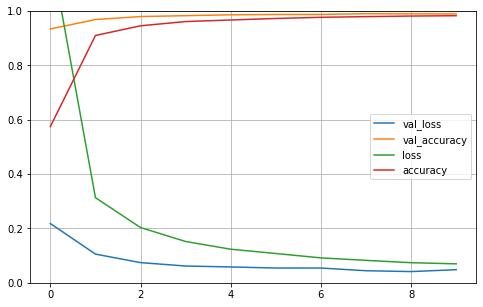

In [18]:
plot_history(cnn_history)

In [19]:
cnn_model.evaluate(preprocessing_image_for_cnn(Xm_test), ym_test)

10000/10000 [==============================] - 2s 239us/step


[9.592603708124141, 0.9894999861717224]

### Training and Evaluation on Fashion MNIST data

In [23]:
cnn_fashion_history = cnn_model.fit(preprocessing_image_for_cnn(Xf_train), yf_train, epochs=10, 
                            validation_data=(preprocessing_image_for_cnn(Xf_valid), yf_valid))

Train on 55000 samples, validate on 5000 samples
Epoch 1/10
55000/55000 [==============================] - 26s 465us/step - loss: 0.8318 - accuracy: 0.7317 - val_loss: 0.4225 - val_accuracy: 0.8490
Epoch 2/10
55000/55000 [==============================] - 26s 465us/step - loss: 0.5435 - accuracy: 0.8221 - val_loss: 0.3562 - val_accuracy: 0.8714
Epoch 3/10
55000/55000 [==============================] - 26s 464us/step - loss: 0.4732 - accuracy: 0.8476 - val_loss: 0.3335 - val_accuracy: 0.8812
Epoch 4/10
55000/55000 [==============================] - 26s 465us/step - loss: 0.4265 - accuracy: 0.8600 - val_loss: 0.3332 - val_accuracy: 0.8822
Epoch 5/10
55000/55000 [==============================] - 26s 466us/step - loss: 0.3938 - accuracy: 0.8706 - val_loss: 0.2963 - val_accuracy: 0.8932
Epoch 6/10
55000/55000 [==============================] - 26s 465us/step - loss: 0.3695 - accuracy: 0.8777 - val_loss: 0.2929 - val_accuracy: 0.8954
Epoch 7/10
55000/55000 [==============================] -

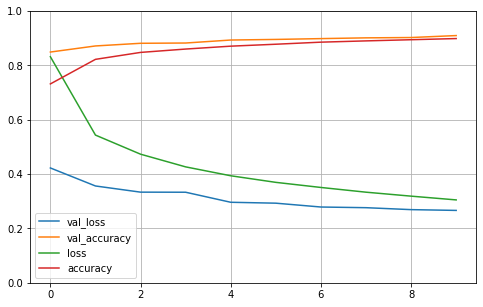

In [24]:
plot_history(cnn_fashion_history)

In [25]:
cnn_model.evaluate(preprocessing_image_for_cnn(Xf_test), yf_test)

10000/10000 [==============================] - 2s 188us/step


[35.19765847899066, 0.8973000049591064]

In [17]:
def build_cnn_1(k_initializer='random_uniform', b_initializer='random_uniform', activation='relu',
                optimizer="sgd",loss="sparse_categorical_crossentropy", padding="same",
                k_regularizer=None, b_regularizer=None):
    
    model = keras.models.Sequential([
        keras.layers.Conv2D(64, 7, activation=activation, padding=padding, input_shape=[28, 28, 1],
                            kernel_initializer=k_initializer, bias_initializer=b_initializer),
        keras.layers.MaxPooling2D(2),
        keras.layers.Conv2D(128, 3, activation=activation, padding=padding,
                            kernel_initializer=k_initializer, bias_initializer=b_initializer),
        keras.layers.Conv2D(128, 3, activation=activation, padding=padding,
                            kernel_initializer=k_initializer, bias_initializer=b_initializer),
        keras.layers.MaxPooling2D(2),
        keras.layers.Conv2D(256, 3, activation=activation, padding=padding, 
                            kernel_initializer=k_initializer, bias_initializer=b_initializer),
        keras.layers.Conv2D(256, 3, activation=activation, padding=padding, 
                            kernel_initializer=k_initializer, bias_initializer=b_initializer),
        keras.layers.MaxPooling2D(2),
        keras.layers.Flatten(),
        keras.layers.Dense(128, activation=activation, kernel_initializer=k_initializer, bias_initializer=b_initializer),
        keras.layers.Dropout(0.5),
        keras.layers.Dense(64, activation=activation, kernel_initializer=k_initializer, bias_initializer=b_initializer),
        keras.layers.Dropout(0.5),
        keras.layers.Dense(10, activation="softmax", kernel_initializer=k_initializer, bias_initializer=b_initializer)
                  ])
    
    model.compile(optimizer=optimizer,
                  loss=loss,
                  metrics=["accuracy"])
    return model

In [18]:
def gridSearch(param_distribs):
    keras_clas = keras.wrappers.scikit_learn.KerasClassifier(build_cnn_1)
    grid_search_cv = GridSearchCV(keras_clas, param_distribs, cv=3, error_score=np.nan)
    grid_search_cv.fit(preprocessing_image_for_cnn(Xf_train), yf_train, epochs=5,
                       validation_data=(preprocessing_image_for_cnn(Xf_valid), yf_valid),
                       callbacks=[keras.callbacks.EarlyStopping(patience=3)])
    return grid_search_cv

#### 1. Initializers

In [11]:
inits = [keras.initializers.Zeros(), 
         keras.initializers.Ones(), 
         keras.initializers.RandomNormal(mean=0.0, stddev=0.05, seed=None)]
param_distribs= {'k_initializer': inits, 'b_initializer': inits}

grid_search_cv = gridSearch(param_distribs)

Train on 36666 samples, validate on 5000 samples
Epoch 1/5
36666/36666 [==============================] - 26s 713us/step - loss: 2.3027 - accuracy: 0.0989 - val_loss: 2.3027 - val_accuracy: 0.0980
Epoch 2/5
36666/36666 [==============================] - 17s 453us/step - loss: 2.3027 - accuracy: 0.0989 - val_loss: 2.3028 - val_accuracy: 0.0980
Epoch 3/5
36666/36666 [==============================] - 17s 454us/step - loss: 2.3026 - accuracy: 0.1005 - val_loss: 2.3029 - val_accuracy: 0.0980
Epoch 4/5
18334/18334 [==============================] - 3s 172us/step
Train on 36667 samples, validate on 5000 samples
Epoch 1/5
36667/36667 [==============================] - 18s 488us/step - loss: 2.3027 - accuracy: 0.0971 - val_loss: 2.3027 - val_accuracy: 0.1008
Epoch 2/5
36667/36667 [==============================] - 17s 452us/step - loss: 2.3027 - accuracy: 0.0985 - val_loss: 2.3028 - val_accuracy: 0.1008
Epoch 3/5
36667/36667 [==============================] - 17s 453us/step - loss: 2.3027 - ac

In [12]:
inits_df = pd.DataFrame(grid_search_cv.cv_results_)
inits_df

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_b_initializer,param_k_initializer,params,split0_test_score,split1_test_score,split2_test_score,mean_test_score,std_test_score,rank_test_score
0,71.146117,4.094358,3.043326,0.151773,<keras.initializers.Zeros object at 0x7f9ed9d9...,<keras.initializers.Zeros object at 0x7f9ed9d9...,{'b_initializer': <keras.initializers.Zeros ob...,0.097033,0.096874,0.098947,0.097618,0.000942,6
1,67.962179,0.033560,2.797408,0.005126,<keras.initializers.Zeros object at 0x7f9ed9d9...,<keras.initializers.Ones object at 0x7f9ed9d99...,{'b_initializer': <keras.initializers.Zeros ob...,0.097033,0.096874,0.097038,0.096982,0.000076,7
2,86.375292,1.535231,2.775373,0.061390,<keras.initializers.Zeros object at 0x7f9ed9d9...,<keras.initializers.RandomNormal object at 0x7...,{'b_initializer': <keras.initializers.Zeros ob...,0.843624,0.838979,0.846615,0.843073,0.003142,1
3,84.895720,0.065386,2.827007,0.004484,<keras.initializers.Ones object at 0x7f9ed9d99...,<keras.initializers.Zeros object at 0x7f9ed9d9...,{'b_initializer': <keras.initializers.Ones obj...,0.100087,0.096874,0.099111,0.098691,0.001345,4
4,79.593447,8.003321,2.836142,0.028097,<keras.initializers.Ones object at 0x7f9ed9d99...,<keras.initializers.Ones object at 0x7f9ed9d99...,{'b_initializer': <keras.initializers.Ones obj...,0.097033,0.096874,0.097038,0.096982,0.000076,7
5,86.175680,1.052846,2.766570,0.065984,<keras.initializers.Ones object at 0x7f9ed9d99...,<keras.initializers.RandomNormal object at 0x7...,{'b_initializer': <keras.initializers.Ones obj...,0.813843,0.809469,0.097693,0.573673,0.336569,3
6,73.938153,7.761553,2.818321,0.006145,<keras.initializers.RandomNormal object at 0x7...,<keras.initializers.Zeros object at 0x7f9ed9d9...,{'b_initializer': <keras.initializers.RandomNo...,0.099051,0.096874,0.097038,0.097655,0.000990,5
7,79.161461,7.822637,2.811261,0.009292,<keras.initializers.RandomNormal object at 0x7...,<keras.initializers.Ones object at 0x7f9ed9d99...,{'b_initializer': <keras.initializers.RandomNo...,0.097033,0.096874,0.097038,0.096982,0.000076,7
8,86.194941,1.099869,2.793692,0.057916,<keras.initializers.RandomNormal object at 0x7...,<keras.initializers.RandomNormal object at 0x7...,{'b_initializer': <keras.initializers.RandomNo...,0.828624,0.854852,0.831179,0.838218,0.011808,2


In [13]:
grid_search_cv.best_params_

{'b_initializer': <keras.initializers.Zeros at 0x7f9ed9d99d50>,
 'k_initializer': <keras.initializers.RandomNormal at 0x7f9ed9d99b90>}

In [14]:
grid_search_cv.best_estimator_.score(preprocessing_image_for_cnn(Xf_test), yf_test)

10000/10000 [==============================] - 2s 156us/step


0.8450999855995178

#### 2. Activations

In [26]:
activs = ['sigmoid', 'relu', 'tanh']
param_distribs= {'activation': activs}

grid_search_cv = gridSearch(param_distribs)

Train on 36666 samples, validate on 5000 samples
Epoch 1/5
36666/36666 [==============================] - 17s 473us/step - loss: 2.3089 - accuracy: 0.0993 - val_loss: 2.3032 - val_accuracy: 0.1024
Epoch 2/5
36666/36666 [==============================] - 17s 458us/step - loss: 2.3065 - accuracy: 0.0991 - val_loss: 2.3037 - val_accuracy: 0.0976
Epoch 3/5
36666/36666 [==============================] - 17s 465us/step - loss: 2.3057 - accuracy: 0.0987 - val_loss: 2.3040 - val_accuracy: 0.0914
Epoch 4/5
36666/36666 [==============================] - 17s 464us/step - loss: 2.3058 - accuracy: 0.0986 - val_loss: 2.3026 - val_accuracy: 0.1012
Epoch 5/5
18334/18334 [==============================] - 3s 166us/step
Train on 36667 samples, validate on 5000 samples
Epoch 1/5
36667/36667 [==============================] - 18s 483us/step - loss: 2.3090 - accuracy: 0.0991 - val_loss: 2.3040 - val_accuracy: 0.1112
Epoch 2/5
36667/36667 [==============================] - 17s 467us/step - loss: 2.3067 - ac

In [27]:
activs_df = pd.DataFrame(grid_search_cv.cv_results_)
activs_df

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_activation,params,split0_test_score,split1_test_score,split2_test_score,mean_test_score,std_test_score,rank_test_score
0,81.384520,7.115098,2.816519,0.159537,sigmoid,{'activation': 'sigmoid'},0.097033,0.101893,0.099765,0.099564,0.001989,3
1,85.855708,0.279259,2.848913,0.011724,relu,{'activation': 'relu'},0.747955,0.750668,0.771232,0.756618,0.010393,2
2,85.448889,0.460295,2.878455,0.048298,tanh,{'activation': 'tanh'},0.832279,0.847434,0.841324,0.840345,0.006226,1


In [28]:
grid_search_cv.best_params_

{'activation': 'tanh'}

In [29]:
est = grid_search_cv.best_estimator_
est.score(preprocessing_image_for_cnn(Xf_test), yf_test)

10000/10000 [==============================] - 1s 150us/step


0.8003000020980835

#### 3. Optimizers

In [19]:
optims = [keras.optimizers.SGD(learning_rate=0.001),
          keras.optimizers.RMSprop(learning_rate=0.001, rho=0.9),
          keras.optimizers.Adagrad(learning_rate=0.001),
          keras.optimizers.Adam(learning_rate=0.001)]

param_distribs= {'optimizer': optims}

grid_search_cv = gridSearch(param_distribs)

Train on 36666 samples, validate on 5000 samples
Epoch 1/5
36666/36666 [==============================] - 21s 580us/step - loss: 2.3030 - accuracy: 0.1010 - val_loss: 2.3036 - val_accuracy: 0.0914
Epoch 2/5
36666/36666 [==============================] - 21s 559us/step - loss: 2.3027 - accuracy: 0.1015 - val_loss: 2.3034 - val_accuracy: 0.0914
Epoch 3/5
36666/36666 [==============================] - 20s 556us/step - loss: 2.3025 - accuracy: 0.1044 - val_loss: 2.3031 - val_accuracy: 0.0914
Epoch 4/5
36666/36666 [==============================] - 21s 576us/step - loss: 2.3024 - accuracy: 0.1038 - val_loss: 2.3029 - val_accuracy: 0.0914
Epoch 5/5
18334/18334 [==============================] - 4s 234us/step
Train on 36667 samples, validate on 5000 samples
Epoch 1/5
36667/36667 [==============================] - 16s 432us/step - loss: 2.3028 - accuracy: 0.1031 - val_loss: 2.3034 - val_accuracy: 0.1012
Epoch 2/5
36667/36667 [==============================] - 18s 489us/step - loss: 2.3026 - ac

In [20]:
optims_df = pd.DataFrame(grid_search_cv.cv_results_)
optims_df

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_optimizer,params,split0_test_score,split1_test_score,split2_test_score,mean_test_score,std_test_score,rank_test_score
0,98.647550,5.004391,4.335077,0.036053,<keras.optimizers.SGD object at 0x7f82670b91d0>,{'optimizer': <keras.optimizers.SGD object at ...,0.100087,0.099547,0.097693,0.099109,0.001026,4
1,101.437914,2.989342,3.994335,0.515481,<keras.optimizers.RMSprop object at 0x7f81dfee...,{'optimizer': <keras.optimizers.RMSprop object...,0.854260,0.830797,0.867507,0.850855,0.015179,2
2,102.129603,6.980343,4.106051,0.278512,<keras.optimizers.Adagrad object at 0x7f82670b...,{'optimizer': <keras.optimizers.Adagrad object...,0.778499,0.795451,0.782251,0.785400,0.007270,3
3,100.121864,5.558073,4.291155,0.028987,<keras.optimizers.Adam object at 0x7f82670b9ed0>,{'optimizer': <keras.optimizers.Adam object at...,0.893858,0.872743,0.877925,0.881509,0.008985,1


In [21]:
grid_search_cv.best_params_

{'optimizer': <keras.optimizers.Adam at 0x7f82670b9ed0>}

In [22]:
est = grid_search_cv.best_estimator_
est.score(preprocessing_image_for_cnn(Xf_test), yf_test)

10000/10000 [==============================] - 3s 281us/step


0.8733999729156494

#### 4. Regularizers

In [36]:
reguls = [keras.regularizers.l1(0.1),
          keras.regularizers.l2(0.1),
          keras.regularizers.l1_l2(l1=0.01, l2=0.01),
          None]

param_distribs= {'k_regularizer': reguls, 'b_regularizer': reguls}

grid_search_cv = gridSearch(param_distribs)

Train on 36666 samples, validate on 5000 samples
Epoch 1/5
36666/36666 [==============================] - 17s 467us/step - loss: 2.3022 - accuracy: 0.1054 - val_loss: 2.3012 - val_accuracy: 0.0980
Epoch 2/5
36666/36666 [==============================] - 17s 460us/step - loss: 2.2927 - accuracy: 0.1414 - val_loss: 2.2310 - val_accuracy: 0.2380
Epoch 3/5
36666/36666 [==============================] - 17s 461us/step - loss: 1.3504 - accuracy: 0.4603 - val_loss: 0.8853 - val_accuracy: 0.6516
Epoch 4/5
36666/36666 [==============================] - 17s 462us/step - loss: 0.9276 - accuracy: 0.6477 - val_loss: 0.7120 - val_accuracy: 0.7336
Epoch 5/5
18334/18334 [==============================] - 3s 155us/step
Train on 36667 samples, validate on 5000 samples
Epoch 1/5
36667/36667 [==============================] - 17s 467us/step - loss: 2.3025 - accuracy: 0.1049 - val_loss: 2.3012 - val_accuracy: 0.1026
Epoch 2/5
36667/36667 [==============================] - 17s 462us/step - loss: 2.2977 - ac

In [37]:
reguls_df = pd.DataFrame(grid_search_cv.cv_results_)
reguls_df

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_b_regularizer,param_k_regularizer,params,split0_test_score,split1_test_score,split2_test_score,mean_test_score,std_test_score,rank_test_score
0,86.945315,1.415069,2.806189,0.067548,<keras.regularizers.L1L2 object at 0x7f9e6473c...,<keras.regularizers.L1L2 object at 0x7f9e6473c...,{'b_regularizer': <keras.regularizers.L1L2 obj...,0.746918,0.749359,0.749632,0.748636,0.001220,7
1,86.299483,0.538223,2.879767,0.046586,<keras.regularizers.L1L2 object at 0x7f9e6473c...,<keras.regularizers.L1L2 object at 0x7f9e6473c...,{'b_regularizer': <keras.regularizers.L1L2 obj...,0.761809,0.745432,0.714122,0.740455,0.019784,14
2,84.983120,0.272393,2.832187,0.006071,<keras.regularizers.L1L2 object at 0x7f9e6473c...,<keras.regularizers.L1L2 object at 0x7f9e6473c...,{'b_regularizer': <keras.regularizers.L1L2 obj...,0.750627,0.752195,0.726668,0.743164,0.011682,12
3,86.467123,1.286640,2.791273,0.079044,<keras.regularizers.L1L2 object at 0x7f9e6473c...,None,{'b_regularizer': <keras.regularizers.L1L2 obj...,0.746155,0.747723,0.762723,0.752200,0.007468,4
4,85.014216,0.162053,2.827686,0.024586,<keras.regularizers.L1L2 object at 0x7f9e6473c...,<keras.regularizers.L1L2 object at 0x7f9e6473c...,{'b_regularizer': <keras.regularizers.L1L2 obj...,0.745009,0.751541,0.743632,0.746727,0.003450,9
5,86.078514,0.723618,2.868180,0.023208,<keras.regularizers.L1L2 object at 0x7f9e6473c...,<keras.regularizers.L1L2 object at 0x7f9e6473c...,{'b_regularizer': <keras.regularizers.L1L2 obj...,0.746973,0.755414,0.763214,0.755200,0.006632,3
6,86.696264,1.741499,2.737960,0.076512,<keras.regularizers.L1L2 object at 0x7f9e6473c...,<keras.regularizers.L1L2 object at 0x7f9e6473c...,{'b_regularizer': <keras.regularizers.L1L2 obj...,0.754718,0.749086,0.747395,0.750400,0.003130,5
7,85.288492,0.109034,2.852799,0.033701,<keras.regularizers.L1L2 object at 0x7f9e6473c...,None,{'b_regularizer': <keras.regularizers.L1L2 obj...,0.740428,0.751923,0.752250,0.748200,0.005498,8
8,85.073678,0.071879,2.839336,0.009460,<keras.regularizers.L1L2 object at 0x7f9e6473c...,<keras.regularizers.L1L2 object at 0x7f9e6473c...,{'b_regularizer': <keras.regularizers.L1L2 obj...,0.757009,0.759777,0.759777,0.758855,0.001305,1
9,87.131565,0.726458,2.806279,0.049881,<keras.regularizers.L1L2 object at 0x7f9e6473c...,<keras.regularizers.L1L2 object at 0x7f9e6473c...,{'b_regularizer': <keras.regularizers.L1L2 obj...,0.737537,0.748486,0.732886,0.739636,0.006539,15


In [38]:
grid_search_cv.best_params_

{'b_regularizer': <keras.regularizers.L1L2 at 0x7f9e6473c250>,
 'k_regularizer': <keras.regularizers.L1L2 at 0x7f9e6473cbd0>}

In [39]:
est = grid_search_cv.best_estimator_
est.score(preprocessing_image_for_cnn(Xf_test), yf_test)

10000/10000 [==============================] - 2s 161us/step


0.7906000018119812

Now; first, We will change model's hyper parameters and then we will change the structure of the model and observe the effects of this change.

1. Initializers
2. Activation functions
3. Optimizers
4. Regularizers

Then;

5. Number of Hidden Conv layers
6. Initial Filter Size
7. Number of Hidden Dense layers
8. Number of Neurons
9. Learning Rate

Then using one of libraries for hyperparameter tuning.

#### Building model with different structure 

In [23]:
def build_cnn_2(initial_filter_size=64, n_nidden_conv=2, n_hidden=1, n_neurons=30, learning_rate=3e-3):
    k_initializer = keras.initializers.RandomNormal(mean=0.0, stddev=0.05, seed=None)
    b_initializer =  keras.initializers.Zeros()
    activation = "tanh"
    
    model = keras.models.Sequential([
        keras.layers.Conv2D(initial_filter_size, 7, activation=activation, padding="same", input_shape=[28, 28, 1],
                            kernel_initializer=k_initializer, bias_initializer=b_initializer),
        keras.layers.MaxPooling2D(2)])
    for conv_layer in range(n_nidden_conv):
        initial_filter_size *= 2
        for n in range(2):
            model.add(keras.layers.Conv2D(initial_filter_size, 3, activation=activation, padding="same",
                                      kernel_initializer=k_initializer, bias_initializer=b_initializer))
        model.add( keras.layers.MaxPooling2D(2))
        
    model.add(keras.layers.Flatten())
    subtraction = int(n_neurons/n_hidden)
        
    for layer in range(n_hidden):
        model.add(keras.layers.Dense(n_neurons-layer*subtraction, activation=activation))
        model.add(keras.layers.Dropout(0.5))
    model.add(keras.layers.Dense(10, activation="softmax", kernel_initializer=k_initializer, bias_initializer=b_initializer))
    
    # optimizer will be changed with the best one so far
    optimizer = keras.optimizers.Adam(learning_rate=0.001)
        
    model.compile(optimizer=optimizer,
                  loss="sparse_categorical_crossentropy",
                  metrics=["accuracy"])
    return model

In [24]:
from scipy.stats import reciprocal

keras_clas = keras.wrappers.scikit_learn.KerasClassifier(build_cnn_2)

param_distribs= {
    'initial_filter_size': [16, 32, 64],
    'n_nidden_conv': [1, 2, 3],
    'n_hidden': [1, 2, 3],
    'n_neurons':np.arange(1, 100), 
    'learning_rate':reciprocal(3e-4, 3e-2)
    }

rnd_search_cv = RandomizedSearchCV(keras_clas, param_distribs, n_iter=10, cv=3)
rnd_search_cv.fit(preprocessing_image_for_cnn(Xf_train), yf_train, epochs=10,
                  validation_data=(preprocessing_image_for_cnn(Xf_valid), yf_valid),
                  callbacks=[keras.callbacks.EarlyStopping(patience=3)])

Train on 36666 samples, validate on 5000 samples
Epoch 1/10
36666/36666 [==============================] - 18s 497us/step - loss: 1.4722 - accuracy: 0.4262 - val_loss: 1.0182 - val_accuracy: 0.5948
Epoch 2/10
36666/36666 [==============================] - 18s 497us/step - loss: 1.1861 - accuracy: 0.5205 - val_loss: 0.9197 - val_accuracy: 0.6266
Epoch 3/10
36666/36666 [==============================] - 18s 489us/step - loss: 1.1039 - accuracy: 0.5604 - val_loss: 0.8472 - val_accuracy: 0.6856
Epoch 4/10
36666/36666 [==============================] - 17s 472us/step - loss: 1.0494 - accuracy: 0.5890 - val_loss: 0.7842 - val_accuracy: 0.6942
Epoch 5/10
36666/36666 [==============================] - 18s 481us/step - loss: 1.0106 - accuracy: 0.6195 - val_loss: 0.7487 - val_accuracy: 0.7080
Epoch 6/10
36666/36666 [==============================] - 14s 389us/step - loss: 0.9733 - accuracy: 0.6359 - val_loss: 0.7303 - val_accuracy: 0.7188
Epoch 7/10
36666/36666 [==============================] -

RandomizedSearchCV(cv=3, error_score='raise-deprecating',
                   estimator=<keras.wrappers.scikit_learn.KerasClassifier object at 0x7f81f3341c90>,
                   iid='warn', n_iter=10, n_jobs=None,
                   param_distributions={'initial_filter_size': [16, 32, 64],
                                        'learning_rate': <scipy.stats._distn_infrastructure.rv_frozen object at 0x7f81f3341cd0>,
                                        'n_hidden': [1, 2, 3],
                                        'n_neurons': array([ 1,  2,  3,  4...
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34,
       35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51,
       52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68,
       69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85,
       86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99]),
                                        'n_nidden_conv': [1, 2, 3]},
     

In [25]:
params_df = pd.DataFrame(rnd_search_cv.cv_results_)
params_df

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_initial_filter_size,param_learning_rate,param_n_hidden,param_n_neurons,param_n_nidden_conv,params,split0_test_score,split1_test_score,split2_test_score,mean_test_score,std_test_score,rank_test_score
0,174.528564,7.476765,3.558786,0.046541,64,0.00309662,3,55,1,"{'initial_filter_size': 64, 'learning_rate': 0...",0.749918,0.741232,0.709431,0.733527,0.017403,6
1,102.593863,2.877537,2.320793,0.045181,32,0.00150603,1,90,1,"{'initial_filter_size': 32, 'learning_rate': 0...",0.895113,0.895544,0.897780,0.896145,0.001169,1
2,100.441344,6.641100,1.516016,0.547886,16,0.0286736,1,29,2,"{'initial_filter_size': 16, 'learning_rate': 0...",0.878968,0.891616,0.887634,0.886073,0.005280,2
3,129.495724,1.703665,2.462021,0.026847,16,0.00293031,1,79,3,"{'initial_filter_size': 16, 'learning_rate': 0...",0.883386,0.891234,0.871489,0.882036,0.008117,3
4,140.590379,3.061455,2.847848,0.070740,32,0.00545897,3,99,2,"{'initial_filter_size': 32, 'learning_rate': 0...",0.840515,0.852343,0.839088,0.843982,0.005941,5
5,336.932208,0.280884,5.049846,0.610363,64,0.00327991,2,8,3,"{'initial_filter_size': 64, 'learning_rate': 0...",0.199411,0.096874,0.281405,0.192564,0.075489,10
6,152.809499,3.847469,3.475464,0.028792,64,0.000380521,1,27,1,"{'initial_filter_size': 64, 'learning_rate': 0...",0.856660,0.858125,0.846943,0.853909,0.004962,4
7,110.711710,5.618870,2.453525,0.066396,32,0.000359626,2,12,1,"{'initial_filter_size': 32, 'learning_rate': 0...",0.495582,0.403426,0.671630,0.523545,0.111264,7
8,174.164007,32.956448,3.937799,0.561161,64,0.000702288,3,17,2,"{'initial_filter_size': 64, 'learning_rate': 0...",0.198593,0.298696,0.287296,0.261527,0.044745,9
9,158.267027,9.172821,3.419936,0.109420,64,0.0175085,2,9,1,"{'initial_filter_size': 64, 'learning_rate': 0...",0.530490,0.385534,0.289151,0.401727,0.099190,8


In [26]:
rnd_search_cv.best_params_

{'initial_filter_size': 32,
 'learning_rate': 0.00150603481780574,
 'n_hidden': 1,
 'n_neurons': 90,
 'n_nidden_conv': 1}

In [27]:
best_cnn = rnd_search_cv.best_estimator_
best_cnn.score(preprocessing_image_for_cnn(Xf_test), yf_test)

10000/10000 [==============================] - 1s 128us/step


0.8942999839782715

In [28]:
best_cnn.model.summary()

Model: "sequential_75"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_373 (Conv2D)          (None, 28, 28, 32)        1600      
_________________________________________________________________
max_pooling2d_224 (MaxPoolin (None, 14, 14, 32)        0         
_________________________________________________________________
conv2d_374 (Conv2D)          (None, 14, 14, 64)        18496     
_________________________________________________________________
conv2d_375 (Conv2D)          (None, 14, 14, 64)        36928     
_________________________________________________________________
max_pooling2d_225 (MaxPoolin (None, 7, 7, 64)          0         
_________________________________________________________________
flatten_75 (Flatten)         (None, 3136)              0         
_________________________________________________________________
dense_234 (Dense)            (None, 90)              

In [29]:
best_cnn.fit(preprocessing_image_for_cnn(Xf_train), yf_train, epochs=30,
             validation_data=(preprocessing_image_for_cnn(Xf_valid), yf_valid),
             callbacks=[keras.callbacks.EarlyStopping(patience=10)])

Train on 55000 samples, validate on 5000 samples
Epoch 1/30
55000/55000 [==============================] - 15s 266us/step - loss: 0.5410 - accuracy: 0.8083 - val_loss: 0.3827 - val_accuracy: 0.8618
Epoch 2/30
55000/55000 [==============================] - 16s 293us/step - loss: 0.4210 - accuracy: 0.8494 - val_loss: 0.3379 - val_accuracy: 0.8764
Epoch 3/30
55000/55000 [==============================] - 14s 259us/step - loss: 0.3874 - accuracy: 0.8622 - val_loss: 0.3112 - val_accuracy: 0.8874
Epoch 4/30
55000/55000 [==============================] - 14s 258us/step - loss: 0.3697 - accuracy: 0.8690 - val_loss: 0.3014 - val_accuracy: 0.8914
Epoch 5/30
55000/55000 [==============================] - 16s 285us/step - loss: 0.3522 - accuracy: 0.8757 - val_loss: 0.2999 - val_accuracy: 0.8914
Epoch 6/30
55000/55000 [==============================] - 16s 285us/step - loss: 0.3452 - accuracy: 0.8770 - val_loss: 0.2959 - val_accuracy: 0.8924
Epoch 7/30
55000/55000 [==============================] -

In [30]:
best_cnn.model.evaluate(preprocessing_image_for_cnn(Xf_test), yf_test)

10000/10000 [==============================] - 1s 146us/step


[0.26655174696445466, 0.9018999934196472]

In [32]:
best_cnn.model.save("./models/cnn.h5")